In [20]:
import pandas as pd
!pip install imblearn
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [22]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [23]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [24]:
positive=df[df["y"]=="yes"]
negative=df[df["y"]=="no"]
print("Total rows : ",df.shape[0],"Positive : ",positive.shape[0],"Negative : ",negative.shape[0])

Total rows :  41188 Positive :  4640 Negative :  36548


<BarContainer object of 2 artists>

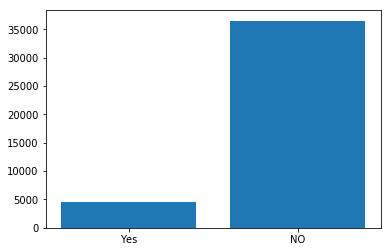

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(["Yes","NO"],[positive.shape[0],negative.shape[0]])

From above graph we see that the data is imbalanced. Training our model using this data might make it bias on the majority class. To cope with this we will be using oversampling technique(SMOTE)

## Vizualizations on data

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
dfviz = pd.read_csv('bank-additional-full.csv',delimiter=';')

## Targeting the people who subscribed 

In [28]:
positivedf=dfviz.loc[dfviz['y']=='yes']
# dfviz.loc[(dfviz['age']>10) & (dfviz['age']<30)]
print("min age ",dfviz['age'].min(),"max age ",dfviz['age'].max())

min age  17 max age  98


Text(0, 0.5, 'Count')

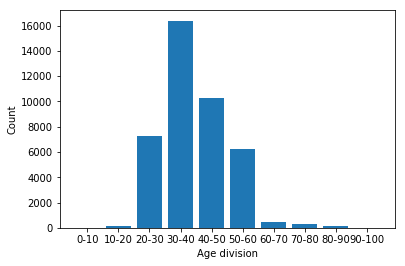

In [29]:
import numpy as np
age=np.array([0,0,0,0,0,0,0,0,0,0])
label=[]
for i in range(10):
    age[i]=dfviz.loc[(dfviz['age']>(i*10)) & (dfviz['age']<=((i+1)*10))].shape[0]
    string= str(i*10)+"-"+str((i+1)*10)
    label.append(string)
    
plt.bar(label,age)
plt.xlabel('Age division')
plt.ylabel('Count')

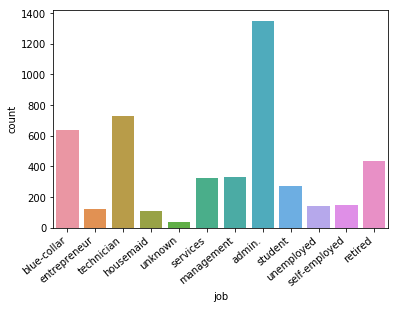

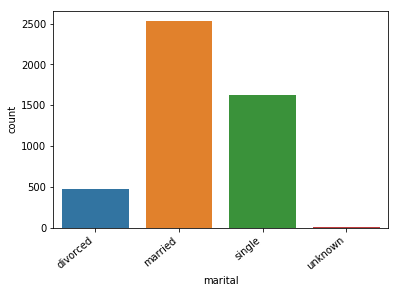

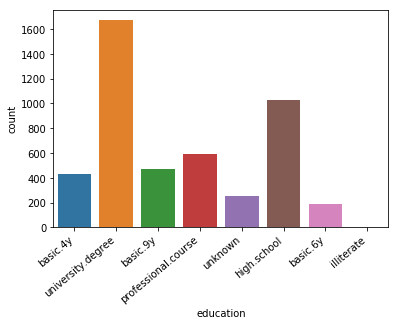

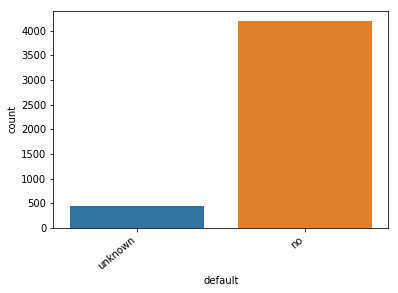

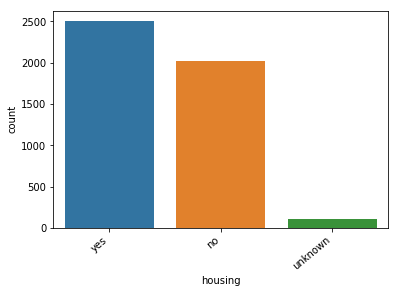

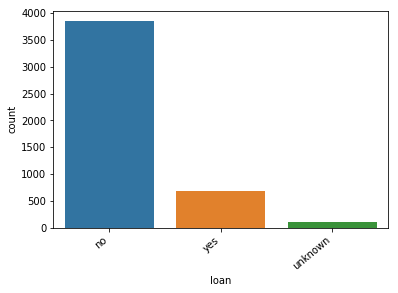

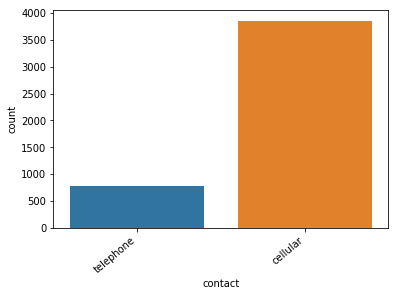

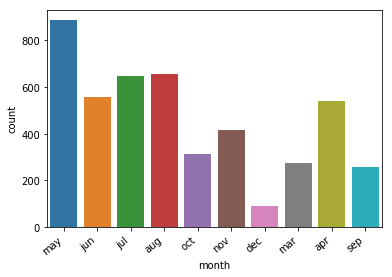

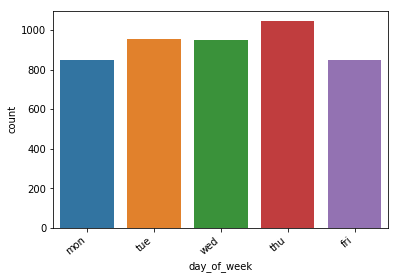

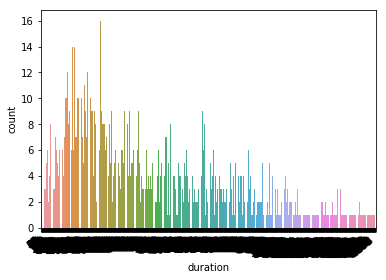

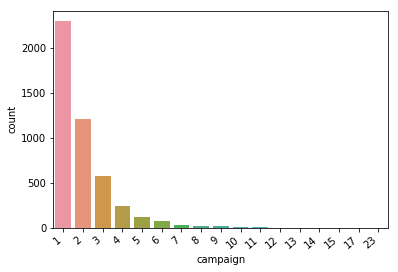

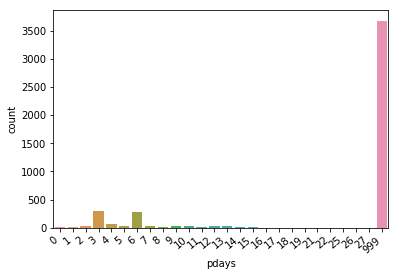

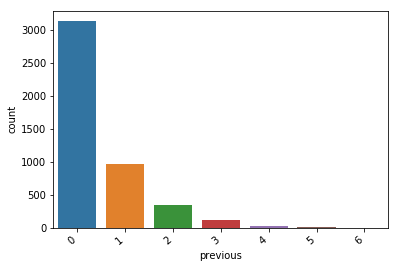

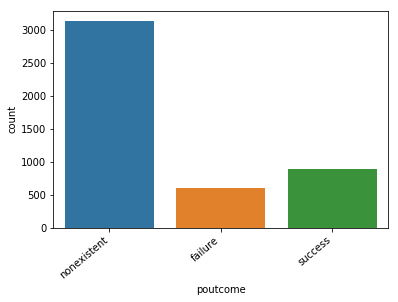

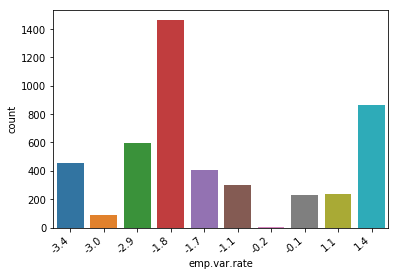

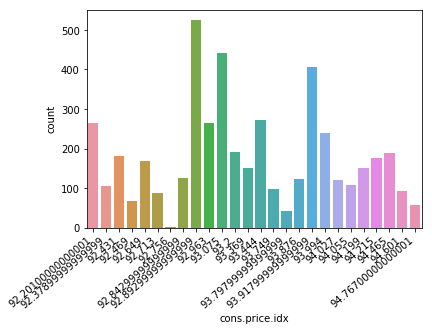

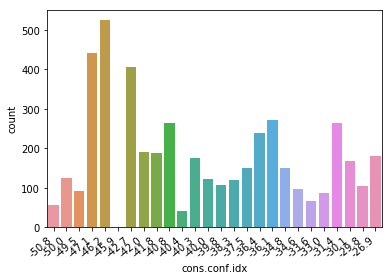

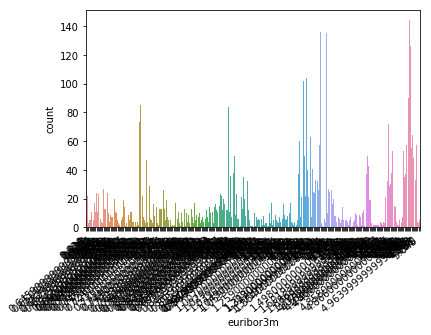

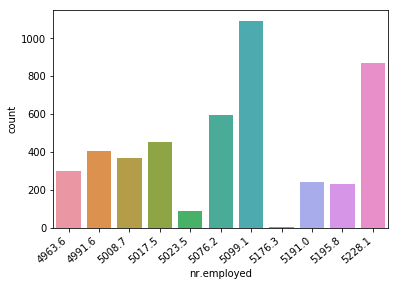

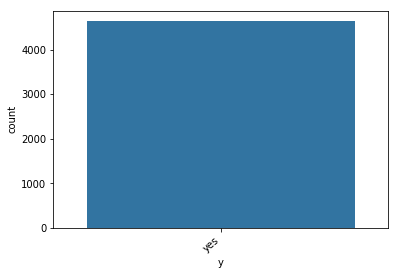

In [30]:
for feature in positivedf.columns:
    if(feature=='age'):
        continue 
    ax=sns.countplot(x=positivedf[feature])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

## Also checking the info for people who didnt subscribe

In [31]:
positivedf=dfviz.loc[dfviz['y']=='no']
# dfviz.loc[(dfviz['age']>10) & (dfviz['age']<30)]
print("min age ",dfviz['age'].min(),"max age ",dfviz['age'].max())

min age  17 max age  98


Text(0, 0.5, 'Count')

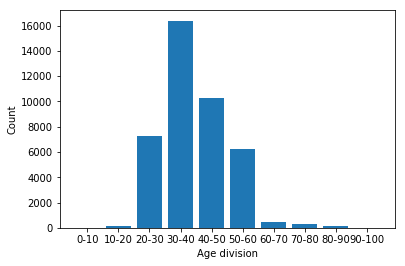

In [32]:
import numpy as np
age=np.array([0,0,0,0,0,0,0,0,0,0])
label=[]
for i in range(10):
    age[i]=dfviz.loc[(dfviz['age']>(i*10)) & (dfviz['age']<=((i+1)*10))].shape[0]
    string= str(i*10)+"-"+str((i+1)*10)
    label.append(string)
    
plt.bar(label,age)
plt.xlabel('Age division')
plt.ylabel('Count')

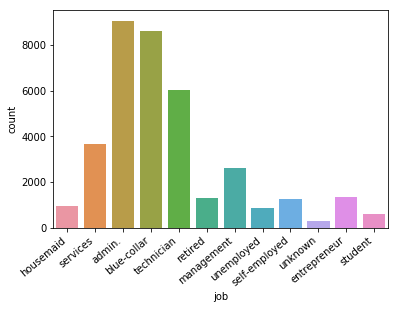

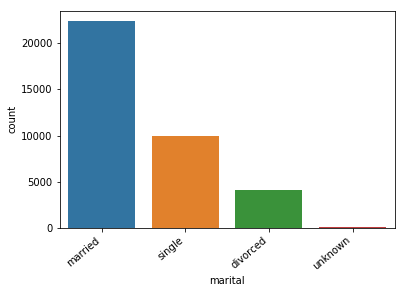

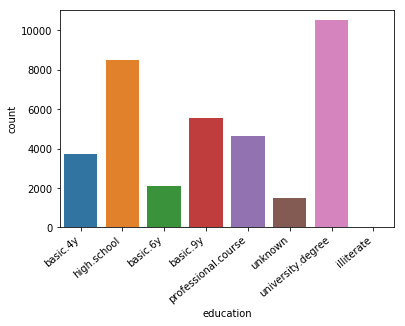

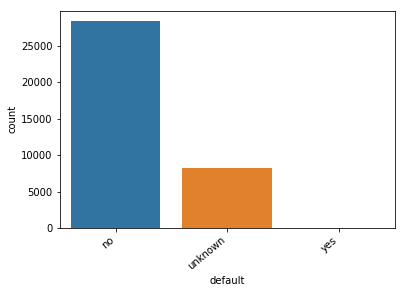

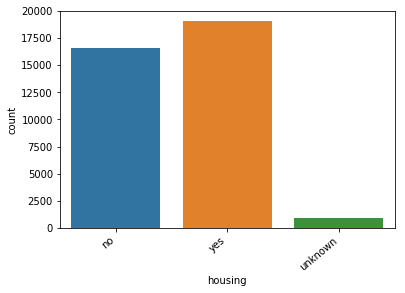

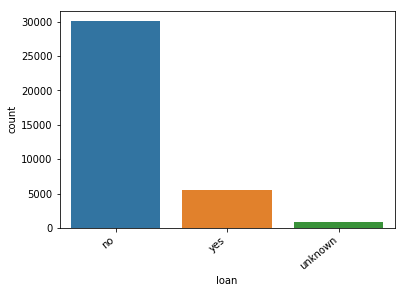

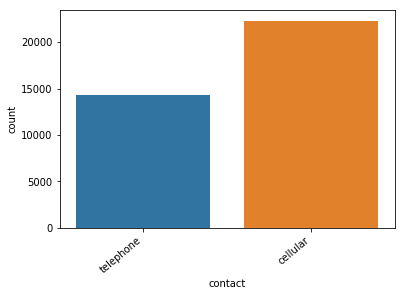

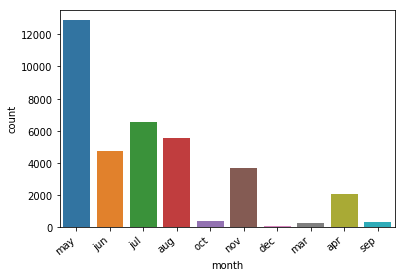

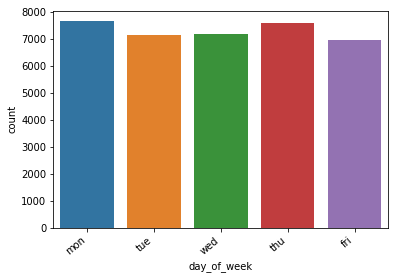

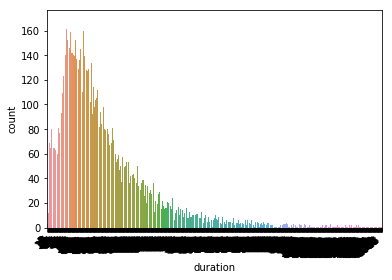

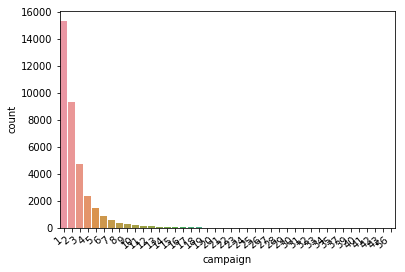

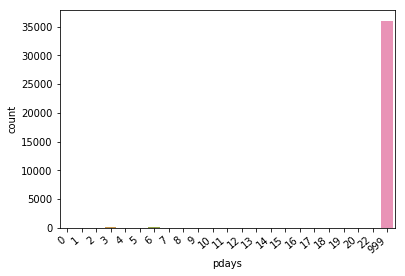

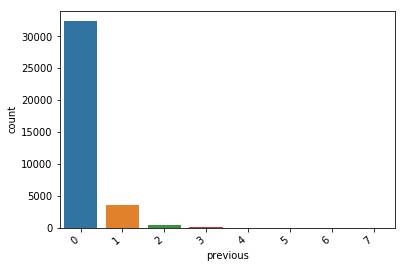

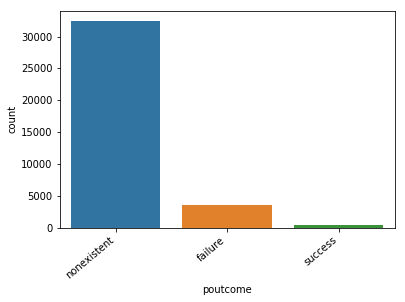

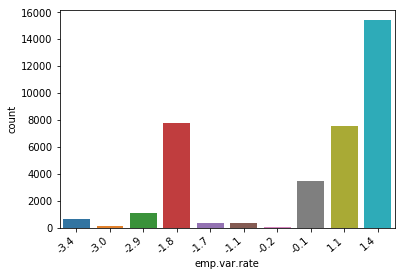

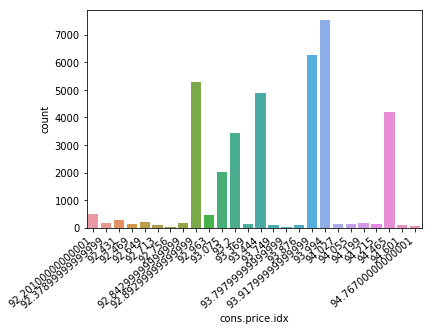

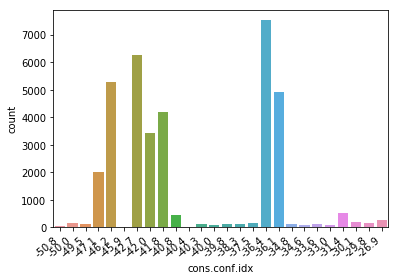

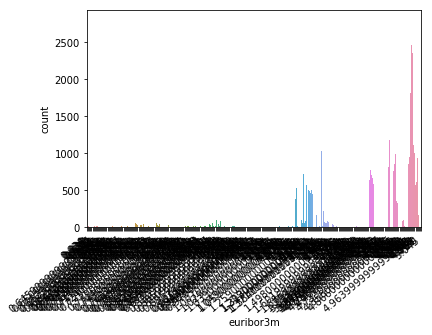

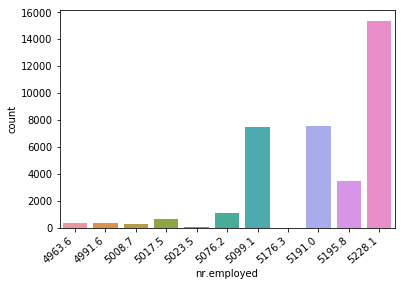

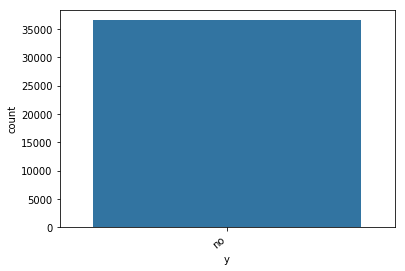

In [33]:
for feature in positivedf.columns:
    if(feature=='age'):
        continue 
    ax=sns.countplot(x=positivedf[feature])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

## Preparing data for training

In [34]:
columns= ["contact","month","day_of_week"]
df= df.drop(columns,axis=1)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [35]:
#one hot encoding all the string datas
df = pd.get_dummies(df,columns=["job","marital","education","default","housing","loan","poutcome"],drop_first=True)
#newdf.columns

In [36]:
X=df.loc[:,df.columns!="y"].values
Y=df.loc[:,df.columns=="y"].values.flatten()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2);

In [38]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Imputer, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfmodel=RandomForestClassifier(n_estimators=50,max_features=0.25,criterion="entropy",class_weight="balanced")
Model=make_pipeline(Imputer(strategy='mean'),
                                RobustScaler(),
                                SMOTE(),
                                rfmodel)
cross_val_score(Model,X,Y,cv=10).mean()

/home/pratik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/pratik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/pratik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/pratik/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWa

0.6684131545010914

In [40]:
Model.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('smote', SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=...tors=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,Model.predict(x_test)))
confusion_matrix(y_test, Model.predict(x_test))

              precision    recall  f1-score   support

          no       0.96      0.94      0.95      7317
         yes       0.58      0.65      0.61       921

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.77      0.80      0.78      8238
weighted avg       0.91      0.91      0.91      8238



array([[6887,  430],
       [ 323,  598]])

## Further vizualization on the basis of prediction model

In [42]:
# dfviz = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [43]:
# # dfviz[dfviz["age"]>=56 and dfviz["age"]>=56]
# # dfviz.age
# dfviz[df['age'] > 10]
# dfviz['age'].min()
# #dfviz.plot(x='age',kind='bar')
# # #sns.set(rc={'figure.figsize':(14.7,8.27)})
# # ax=sns.countplot(x=dfviz['job'])
# # ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# # plt.show()